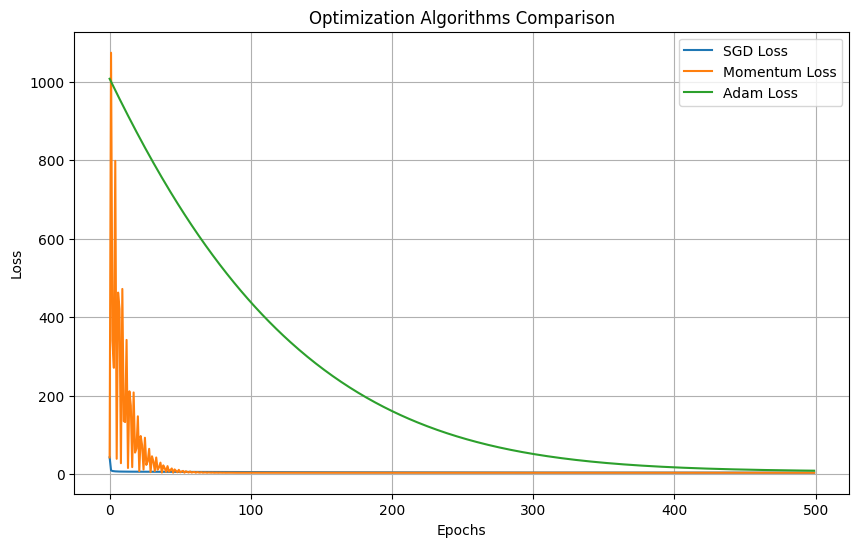

SGD Final parameters: w1 = 3.1043, w2 = 2.1004, b = 3.9035
Momentum Final parameters: w1 = 3.0145, w2 = 2.0096, b = 4.9555
Adam Final parameters: w1 = 2.6940, w2 = 2.4863, b = 2.6439


In [1]:
# Run Code_009
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 800

# Generate two input features (X1, X2)
X1 = np.random.rand(n_samples, 1) * 10  # Feature 1
X2 = np.random.rand(n_samples, 1) * 10  # Feature 2
X = np.hstack((X1, X2))  # Combine into a single (800,2) matrix

# Generate target values with some noise
y = 3 * X1 + 2 * X2 + 5 + np.random.randn(n_samples, 1) * 2  # Equation y = 3x1 + 2x2 + 5 + noise

# Mean Squared Error (MSE) loss function
def mse_loss(w, b, X, y):
    predictions = X.dot(w) + b
    return np.mean((predictions - y) ** 2)

# Compute gradients
def gradients(w, b, X, y):
    predictions = X.dot(w) + b
    error = predictions - y

    # Ensure error is a column vector
    if error.ndim == 1:
        error = error.reshape(-1, 1)

    dw = (2 / len(X)) * X.T.dot(error)
    db = (2 / len(X)) * np.sum(error)

    return dw, db

# Gradient Descent Optimization
def gradient_descent(X, y, learning_rate, epochs):
    w, b = np.zeros((X.shape[1], 1)), 0
    loss_history = []
    
    for _ in range(epochs):
        dw, db = gradients(w, b, X, y)
        w -= learning_rate * dw
        b -= learning_rate * db
        loss_history.append(mse_loss(w, b, X, y))
    
    return w, b, loss_history

# Momentum Gradient Descent
def momentum_gradient_descent(X, y, learning_rate, epochs, momentum=0.9):
    w, b = np.zeros((X.shape[1], 1)), 0
    v_w, v_b = np.zeros_like(w), 0
    loss_history = []
    
    for _ in range(epochs):
        dw, db = gradients(w, b, X, y)
        v_w = momentum * v_w - learning_rate * dw
        v_b = momentum * v_b - learning_rate * db
        w += v_w
        b += v_b
        loss_history.append(mse_loss(w, b, X, y))
    
    return w, b, loss_history

# Adam Optimization Algorithm
def adam(X, y, learning_rate, epochs, beta1=0.9, beta2=0.999):
    w, b = np.zeros((X.shape[1], 1)), 0
    m_w, m_b = np.zeros_like(w), 0
    v_w, v_b = np.zeros_like(w), 0
    loss_history = []
    t = 0
    
    for _ in range(epochs):
        t += 1
        dw, db = gradients(w, b, X, y)
        m_w = beta1 * m_w + (1 - beta1) * dw
        m_b = beta1 * m_b + (1 - beta1) * db
        v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
        v_b = beta2 * v_b + (1 - beta2) * (db ** 2)
        
        m_w_hat = m_w / (1 - beta1 ** t)
        m_b_hat = m_b / (1 - beta1 ** t)
        v_w_hat = v_w / (1 - beta2 ** t)
        v_b_hat = v_b / (1 - beta2 ** t)
        
        w -= learning_rate * m_w_hat / (np.sqrt(v_w_hat) + 1e-8)
        b -= learning_rate * m_b_hat / (np.sqrt(v_b_hat) + 1e-8)
        
        loss_history.append(mse_loss(w, b, X, y))
    
    return w, b, loss_history

# Training settings
learning_rate = 0.01
epochs = 500

# Run optimization algorithms
w_sgd, b_sgd, loss_sgd = gradient_descent(X, y, learning_rate, epochs)
w_momentum, b_momentum, loss_momentum = momentum_gradient_descent(X, y, learning_rate, epochs)
w_adam, b_adam, loss_adam = adam(X, y, learning_rate, epochs)

# Plot loss curves
plt.figure(figsize=(10, 6))
plt.plot(loss_sgd, label="SGD Loss")
plt.plot(loss_momentum, label="Momentum Loss")
plt.plot(loss_adam, label="Adam Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Optimization Algorithms Comparison")
plt.legend()
plt.grid(True)
plt.show()

# Print final parameters
print(f"SGD Final parameters: w1 = {w_sgd[0][0]:.4f}, w2 = {w_sgd[1][0]:.4f}, b = {b_sgd:.4f}")
print(f"Momentum Final parameters: w1 = {w_momentum[0][0]:.4f}, w2 = {w_momentum[1][0]:.4f}, b = {b_momentum:.4f}")
print(f"Adam Final parameters: w1 = {w_adam[0][0]:.4f}, w2 = {w_adam[1][0]:.4f}, b = {b_adam:.4f}")
